In [ ]:
# this gives weather data for one coordinate - delhi is the example
import requests
import json
import pandas as pd
from datetime import datetime, timezone

API_KEY = "rf6LEsFtTtqHfroF7GYGKMjzIjfRlD97"
URL = "https://api.windy.com/api/point-forecast/v2"

def get_weather(lat=28.6139, lon=77.2090, model="gfs",city_name="delhi"):
    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json"
    }

    payload = {
        "lat": lat,
        "lon": lon,
        "model": model,
        "parameters": ["temp", "wind", "rh"],
        "levels": ["surface"],
        "key": API_KEY
    }

    response = requests.post(URL, headers=headers, data=json.dumps(payload))

    if response.status_code == 200:
        data = response.json()
        print("Weather data fetched successfully!")

        # Convert timestamps
        timestamps = [datetime.fromtimestamp(ts / 1000, tz=timezone.utc) for ts in data["ts"]]

        # Build DataFrame
        df = pd.DataFrame({
            "timestamp_utc": timestamps,
            "temp_K": data["temp-surface"],
            "humidity_%": data["rh-surface"],
            "wind_u": data["wind_u-surface"],
            "wind_v": data["wind_v-surface"]
        })

        # Convert to Celsius (optional)
        df["temp_C"] = df["temp_K"] - 273.15

        # Save to CSV
        df.to_csv(f"data/weather_report_{city_name}.csv", index=False)
        print(f"Data saved to weather_report_{city_name}.csv")

        print("\nSample rows:")
        print(df.head(10))
        return df
    else:
        print(f" Error {response.status_code}: {response.text}")
        return None


if __name__ == "__main__":
    # get_weather()
    # This is a script to get weather data for a specific coordinate
    # Here we get the data for a lot of places throught india (20 indian cities) - longitude and latitude and the city name stored in a list
    # Later we store this data in a csv file and then we plot the data on a map using the plotly library

    cities = ['delhi', 'mumbai', 'kolkata', 'chennai', 'bengaluru', 'hyderabad', 'ahmedabad', 'surat', 'pune', 'jaipur', 'lucknow', 'kanpur', 'indore', 'thane', 'bhopal', 'visakhapatnam', 'patna', 'indore', 'bhubaneswar', 'lucknow', 'kanpur']
    longitudes = ['77.2090', '72.8758', '88.3639', '80.2495', '77.5946', '78.4717', '72.5714', '72.8397', '73.8567', '75.8160', '80.9462', '80.9462', '76.9558', '72.9777', '77.3910', '83.2185', '85.1376', '77.3910', '85.1376', '80.9462']
    latitudes = ['28.6139', '19.0760', '22.5726', '13.0878', '13.0878', '17.3663', '23.0225', '21.1702', '18.5204', '26.8443', '26.8443', '26.8443', '22.7196', '19.2347', '23.0225', '17.6868', '20.2959', '23.0225', '20.2959', '26.8443']

    for i in range(len(cities)-1):
        get_weather(lat=latitudes[i],lon=longitudes[i],city_name=cities[i])

    # later we can save the data b/w the east/west or the north/south divide to gain further conclusions 




Weather data fetched successfully!
💾 Data saved to weather_report_delhi.csv

Sample rows:
              timestamp_utc      temp_K  humidity_%    wind_u    wind_v  \
0 2025-10-23 21:00:00+00:00  300.408147   28.923952  1.028049  0.036714   
1 2025-10-24 00:00:00+00:00  299.784875   17.712346  0.814320  1.305490   
2 2025-10-24 03:00:00+00:00  299.124769   33.448332 -0.419889  0.412570   
3 2025-10-24 06:00:00+00:00  299.281086   20.722700  0.458150 -1.755874   
4 2025-10-24 09:00:00+00:00  299.930836   30.617174 -1.345202 -0.070599   
5 2025-10-24 12:00:00+00:00  303.767374   23.565493 -0.977082 -0.112608   
6 2025-10-24 15:00:00+00:00  297.416488   22.749564  0.883291 -0.194756   
7 2025-10-24 18:00:00+00:00  304.207752   34.079107 -0.410907 -0.651757   
8 2025-10-24 21:00:00+00:00  305.723072   28.996140 -1.631242 -1.966068   
9 2025-10-25 00:00:00+00:00  304.743876   21.131682  1.265843 -1.844543   

      temp_C  
0  27.258147  
1  26.634875  
2  25.974769  
3  26.131086  
4  26.780

In [2]:
# workplan
# similar to the above script do it for all the 4 api'set
# create an ml prediction system - parameters(above and others to be used)
# create a cnn prediction system - images
# create a lstm prediction system - radar
# concatenate them and add them with this architecture that was discussed
# read research papers and further improve on this project
# create a running application for this project

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")

df['Precip_predict'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

df = df.drop(columns=["Formatted Date", "Summary", "Precip Type", "Daily Summary"])

df = df.dropna()

X = df.drop(columns=["Precip_predict"])
y = df["Precip_predict"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9829972526048416

Confusion Matrix:
 [[ 2071   229]
 [   99 16892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2300
           1       0.99      0.99      0.99     16991

    accuracy                           0.98     19291
   macro avg       0.97      0.95      0.96     19291
weighted avg       0.98      0.98      0.98     19291



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")

df['Precip_predict'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

df = df.drop(columns=["Formatted Date", "Summary", "Precip Type", "Daily Summary"])

df = df.dropna()

X = df.drop(columns=["Precip_predict"])
y = df["Precip_predict"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model = LogisticRegression(max_iter=1000)
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9961640143071899

Confusion Matrix:
 [[ 2228    72]
 [    2 16989]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2300
           1       1.00      1.00      1.00     16991

    accuracy                           1.00     19291
   macro avg       1.00      0.98      0.99     19291
weighted avg       1.00      1.00      1.00     19291



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")

df['Precip_predict'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

df = df.drop(columns=["Formatted Date", "Summary", "Precip Type", "Daily Summary"])

df = df.dropna()

X = df.drop(columns=["Precip_predict"])
y = df["Precip_predict"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model = LogisticRegression(max_iter=1000)
# model = RandomForestClassifier()
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model,'xgboost_model.joblib')


Accuracy: 0.9945052096832719

Confusion Matrix:
 [[ 2215    85]
 [   21 16970]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2300
           1       1.00      1.00      1.00     16991

    accuracy                           0.99     19291
   macro avg       0.99      0.98      0.99     19291
weighted avg       0.99      0.99      0.99     19291



['xgboost_model.joblib']

In [6]:
df  = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [7]:
len(df['Daily Summary'].unique())

214

In [8]:
!pip install tensorflow

In [ ]:
# ===============================================
# Rain Prediction using LSTM on Text Summaries
# ===============================================

import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")

# Create binary target variable: 1 for rain, 0 for no rain
df['Precip_predict'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

# Combine text columns
df['text'] = df['Summary'].astype(str) + " " + df['Daily Summary'].astype(str)

# Drop rows with missing text or target
df = df.dropna(subset=['text', 'Precip_predict'])

print(f"Dataset loaded: {len(df)} samples")


def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)


X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['Precip_predict'], test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)} | Testing samples: {len(X_test)}")

max_words = 5000   # vocabulary size
max_len = 50       # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


model.save("rain_predict_lstm_model.h5")
print("Model saved as 'rain_predict_lstm_model.h5'")


sample_text = ["Partly cloudy throughout the day."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
pred = model.predict(sample_pad)[0][0]

print("\nSample Prediction:")
print(f"Text: {sample_text[0]}")
print(f"Predicted Rain Probability: {pred:.4f}")
print("Rain" if pred > 0.5 else "No Rain")


Dataset loaded: 96453 samples
🧠 Training samples: 77162 | Testing samples: 19291


c:\Users\vaibh\anaconda3\envs\new_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 113s 56ms/step - accuracy: 0.8850 - loss: 0.3723 - val_accuracy: 0.8808 - val_loss: 0.3662
Epoch 2/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8834 - loss: 0.3672 - val_accuracy: 0.8808 - val_loss: 0.3653
Epoch 3/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.8860 - loss: 0.3602 - val_accuracy: 0.8808 - val_loss: 0.3663
Epoch 4/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8862 - loss: 0.3436 - val_accuracy: 0.8808 - val_loss: 0.3196
Epoch 5/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 92s 29ms/step - accuracy: 0.8844 - loss: 0.3177 - val_accuracy: 0.8806 - val_loss: 0.3151
Epoch 6/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.8832 - loss: 0.3169 - val_accuracy: 0.8808 - val_loss: 0.3155
Epoch 7/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8820 - loss: 0.3136 - val_accuracy: 0.8808 - val_loss: 0.3126
Epoch 8/10
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.8860 


Test Accuracy: 0.8843
Test Loss: 0.3103
Model saved as 'rain_predict_lstm_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step

Sample Prediction:
Text: Partly cloudy throughout the day.
Predicted Rain Probability: 0.9591
Rain


In [10]:
!pip install transformers

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("daanturo/meteo-radar")

print("Path to dataset files:", path)

Resuming download from 38797312 bytes (5952233043 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/daanturo/meteo-radar?dataset_version_number=15 (38797312/5991030355) bytes left.


 25%|██▍       | 1.37G/5.58G [24:15<1:16:40, 983kB/s] 


ConnectionError: HTTPSConnectionPool(host='storage.googleapis.com', port=443): Read timed out.

Found classes: ['cloudy', 'rain', 'shine', 'sunrise']
Class distribution:
class
sunrise    357
cloudy     300
shine      253
rain       215
Name: count, dtype: int64
Total images: 1125

Train samples: 900
Validation samples: 225
Found 900 validated image filenames belonging to 4 classes.
Found 225 validated image filenames belonging to 4 classes.

Class indices: {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

Class weights: {0: 0.9375, 1: 1.308139534883721, 2: 1.113861386138614, 3: 0.7867132867132867}


c:\Users\vaibh\anaconda3\envs\new_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,443,108 (5.51 MB)

 Trainable params: 1,439,652 (5.49 MB)

 Non-trainable params: 3,456 (13.50 KB)


Starting training...

Epoch 1/50


c:\Users\vaibh\anaconda3\envs\new_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.5385 - loss: 2.1153
Epoch 1: val_accuracy improved from -inf to 0.26667, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 496ms/step - accuracy: 0.5402 - loss: 2.1106 - val_accuracy: 0.2667 - val_loss: 2.1649 - learning_rate: 5.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7624 - loss: 1.4249
Epoch 2: val_accuracy did not improve from 0.26667
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 469ms/step - accuracy: 0.7621 - loss: 1.4264 - val_accuracy: 0.2667 - val_loss: 3.0332 - learning_rate: 5.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.8036 - loss: 1.3670
Epoch 3: val_accuracy improved from 0.26667 to 0.32444, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 754ms/step - accuracy: 0.8029 - loss: 1.3688 - val_accuracy: 0.3244 - val_loss: 3.7322 - learning_rate: 5.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.8166 - loss: 1.3388
Epoch 4: val_accuracy did not improve from 0.32444
57/57 ━━━━━━━━━━━━━━━━━━━━ 46s 807ms/step - accuracy: 0.8162 - loss: 1.3391 - val_accuracy: 0.3067 - val_loss: 4.5406 - learning_rate: 5.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7879 - loss: 1.3305
Epoch 5: val_accuracy did not improve from 0.32444
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 633ms/step - accuracy: 0.7877 - loss: 1.3318 - val_accuracy: 0.2889 - val_loss: 4.7068 - learning_rate: 5.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8285 - loss: 1.2275
Epoch 6: val_accuracy improved from 0.32444 to 0.33778, saving model to weather_cnn_improved_model.h5



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 451ms/step - accuracy: 0.8284 - loss: 1.2270 - val_accuracy: 0.3378 - val_loss: 3.2053 - learning_rate: 5.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8323 - loss: 1.2170
Epoch 7: val_accuracy improved from 0.33778 to 0.54222, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 457ms/step - accuracy: 0.8324 - loss: 1.2163 - val_accuracy: 0.5422 - val_loss: 1.9267 - learning_rate: 2.5000e-04
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.8392 - loss: 1.1795
Epoch 8: val_accuracy did not improve from 0.54222
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 462ms/step - accuracy: 0.8390 - loss: 1.1792 - val_accuracy: 0.4178 - val_loss: 3.3238 - learning_rate: 2.5000e-04
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.8582 - loss: 1.1605
Epoch 9: val_accuracy improved from 0.54222 to 0.86222, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 527ms/step - accuracy: 0.8579 - loss: 1.1605 - val_accuracy: 0.8622 - val_loss: 0.9657 - learning_rate: 2.5000e-04
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.8318 - loss: 1.1762
Epoch 10: val_accuracy did not improve from 0.86222
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 553ms/step - accuracy: 0.8319 - loss: 1.1759 - val_accuracy: 0.8222 - val_loss: 1.1511 - learning_rate: 2.5000e-04
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8343 - loss: 1.1736
Epoch 11: val_accuracy improved from 0.86222 to 0.89778, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - accuracy: 0.8344 - loss: 1.1725 - val_accuracy: 0.8978 - val_loss: 0.9630 - learning_rate: 2.5000e-04
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.8545 - loss: 1.1013
Epoch 12: val_accuracy improved from 0.89778 to 0.90222, saving model to weather_cnn_improved_model.h5


57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 446ms/step - accuracy: 0.8543 - loss: 1.1020 - val_accuracy: 0.9022 - val_loss: 0.9540 - learning_rate: 2.5000e-04
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.8594 - loss: 1.1269
Epoch 13: val_accuracy did not improve from 0.90222
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 522ms/step - accuracy: 0.8593 - loss: 1.1269 - val_accuracy: 0.8622 - val_loss: 1.0724 - learning_rate: 2.5000e-04
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.8524 - loss: 1.1758
Epoch 14: val_accuracy did not improve from 0.90222
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 744ms/step - accuracy: 0.8524 - loss: 1.1748 - val_accuracy: 0.8933 - val_loss: 0.9744 - learning_rate: 2.5000e-04
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.8572 - loss: 1.0961
Epoch 15: val_accuracy did not improve from 0.90222
57/57 ━━━━━━━━━━━━━━━━━━━━ 35s 607ms/step - accuracy: 0.8570 - loss: 1.0965 - val_accuracy: 0.7644 - val_loss: 1.2774 - learning_rate: 2.5000e-04

57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 486ms/step - accuracy: 0.8765 - loss: 1.0668 - val_accuracy: 0.9111 - val_loss: 0.9792 - learning_rate: 1.2500e-04
Epoch 20/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.8584 - loss: 1.0124
Epoch 20: val_accuracy did not improve from 0.91111
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 542ms/step - accuracy: 0.8586 - loss: 1.0122 - val_accuracy: 0.7956 - val_loss: 1.2609 - learning_rate: 1.2500e-04
Epoch 21/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8905 - loss: 0.9650
Epoch 21: val_accuracy did not improve from 0.91111
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 527ms/step - accuracy: 0.8903 - loss: 0.9656 - val_accuracy: 0.7244 - val_loss: 1.5514 - learning_rate: 1.2500e-04
Epoch 22/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.8841 - loss: 0.9666
Epoch 22: val_accuracy did not improve from 0.91111

Epoch 22: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 703ms/step - accuracy: 0.8842 - loss:

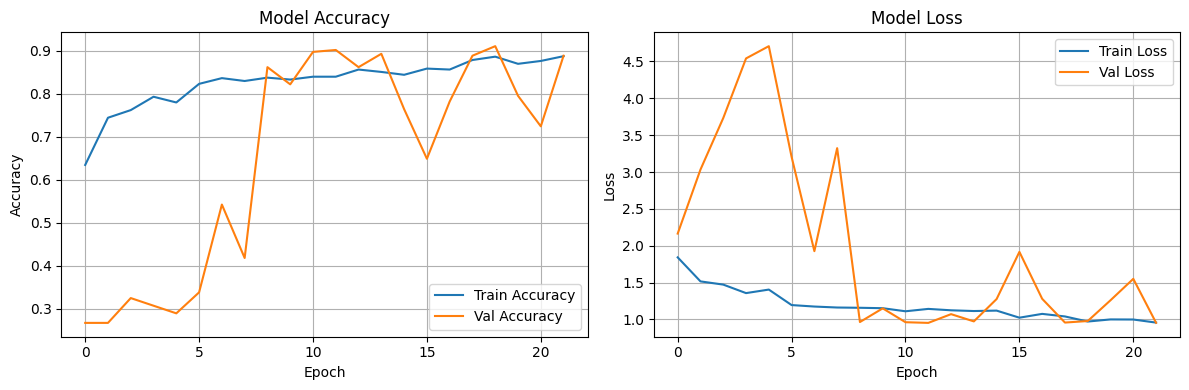

In [ ]:
"""
weather_cnn_improved.py

Improved CNN with deeper architecture, better regularization,
and class balancing for weather classification.

Requirements:
    pip install tensorflow pandas scikit-learn
"""

import os
import re
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tf.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                                       Dropout, BatchNormalization, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# -----------------------------
# Config
# -----------------------------
dataset_path = r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\dataset2"
img_height, img_width = 150, 150  # Slightly larger input
batch_size = 16  # Smaller batch for better generalization
seed = 42
epochs = 50  # More epochs with better early stopping
model_save_path = "weather_cnn_improved_model.h5"

# -----------------------------
# 1) Build DataFrame from filenames
# -----------------------------
filenames = [f for f in os.listdir(dataset_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
if len(filenames) == 0:
    raise SystemExit(f"No image files found in {dataset_path}")

def extract_label_from_filename(fname):
    m = re.match(r"([A-Za-z]+)", fname)
    if m:
        return m.group(1).lower()
    return fname.split("_")[0].split("-")[0].lower()

labels = [extract_label_from_filename(f) for f in filenames]

df = pd.DataFrame({
    "filename": filenames,
    "class": labels
})

print("Found classes:", sorted(df['class'].unique()))
print("Class distribution:")
print(df['class'].value_counts())
print("Total images:", len(df))

# -----------------------------
# 2) Train/Validation split
# -----------------------------
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=seed)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print(f"\nTrain samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# -----------------------------
# 3) Image generators with stronger augmentation
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=dataset_path,
    x_col="filename",
    y_col="class",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=seed
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=dataset_path,
    x_col="filename",
    y_col="class",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("\nClass indices:", train_generator.class_indices)

# -----------------------------
# 4) Compute class weights to handle imbalance
# -----------------------------
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['class']),
    y=train_df['class']
)
class_weights = dict(enumerate(class_weights_array))
print("\nClass weights:", class_weights)

# -----------------------------
# 5) Improved deeper CNN model
# -----------------------------
def build_improved_cnn(input_shape=(img_height, img_width, 3), n_classes=num_classes):
    model = Sequential([
        # Block 1
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        # Block 2
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.25),

        # Block 3
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.3),

        # Block 4
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.3),

        # Global pooling instead of Flatten
        GlobalAveragePooling2D(),
        
        # Dense layers
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(n_classes, activation='softmax')
    ])
    return model

model = build_improved_cnn()
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower initial learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 6) Enhanced callbacks
# -----------------------------
callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True, 
        verbose=1
    ),
    ModelCheckpoint(
        model_save_path, 
        monitor='val_accuracy',  # Monitor accuracy instead
        save_best_only=True, 
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# -----------------------------
# 7) Train with class weights
# -----------------------------
steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(val_generator.samples / batch_size)

print("\n" + "="*60)
print("Starting training...")
print("="*60 + "\n")

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=callbacks,
    class_weight=class_weights,  # Handle class imbalance
    verbose=1
)

# -----------------------------
# 8) Evaluate and detailed metrics
# -----------------------------
print("\n" + "="*60)
print("Evaluating model...")
print("="*60 + "\n")

val_generator.reset()
preds = model.predict(val_generator, steps=validation_steps, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes[:len(y_pred)]

acc = np.mean(y_pred == y_true)
print(f"\nFinal Validation Accuracy: {acc:.4f}")

from sklearn.metrics import classification_report, confusion_matrix
target_names = list(train_generator.class_indices.keys())

print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_true, y_pred, target_names=target_names))

print("\n" + "="*60)
print("Confusion Matrix:")
print("="*60)
print(confusion_matrix(y_true, y_pred))

# Print per-class accuracy
cm = confusion_matrix(y_true, y_pred)
per_class_acc = cm.diagonal() / cm.sum(axis=1)
print("\n" + "="*60)
print("Per-Class Accuracy:")
print("="*60)
for class_name, acc in zip(target_names, per_class_acc):
    print(f"{class_name:>10s}: {acc:.4f}")

print(f"\n{'='*60}")
print(f"Model saved at: {model_save_path}")
print(f"{'='*60}")

# -----------------------------
# 9) Plot training history (optional)
# -----------------------------
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
    print("\nTraining history plot saved as 'training_history.png'")
except ImportError:
    print("\nmatplotlib not available - skipping plot generation")

In [21]:
"""
weather_cnn_efficientnetv2_fixed.py

Fixed transfer learning with proper configuration for small datasets.
Addresses common issues that cause poor performance.

Requirements:
    pip install tensorflow pandas scikit-learn matplotlib
"""

import os
import re
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, GlobalAveragePooling2D, Dropout, 
                                       BatchNormalization, Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# -----------------------------
# Config - OPTIMIZED FOR SMALL DATASETS
# -----------------------------
dataset_path = r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\dataset2"
img_height, img_width = 224, 224
batch_size = 8  # REDUCED - smaller batches for better gradients
seed = 42

# More aggressive training
initial_epochs = 20      # More epochs for initial training
fine_tune_epochs = 30    # More epochs for fine-tuning
total_epochs = initial_epochs + fine_tune_epochs

model_save_path = "weather_efficientnetv2_fixed.h5"
final_model_path = "weather_efficientnetv2_final_fixed.h5"

# Fine-tune MORE layers (was 150, now 100)
fine_tune_at = 100  # Unfreeze more layers earlier

print("="*70)
print("WEATHER CLASSIFICATION - FIXED EFFICIENTNETV2B0")
print("="*70)

# -----------------------------
# 1) Build DataFrame
# -----------------------------
filenames = [f for f in os.listdir(dataset_path) 
             if f.lower().endswith((".jpg", ".jpeg", ".png"))]

if len(filenames) == 0:
    raise SystemExit(f"No image files found in {dataset_path}")

def extract_label_from_filename(fname):
    m = re.match(r"([A-Za-z]+)", fname)
    return m.group(1).lower() if m else fname.split("_")[0].split("-")[0].lower()

labels = [extract_label_from_filename(f) for f in filenames]
df = pd.DataFrame({"filename": filenames, "class": labels})

print("\nDataset Summary:")
print("-" * 70)
print(f"Total images: {len(df)}")
print("\nClass distribution:")
class_counts = df['class'].value_counts()
for cls, count in class_counts.items():
    print(f"  {cls:>10s}: {count:>4d} images ({count/len(df)*100:>5.1f}%)")

# -----------------------------
# 2) Train/Validation split
# -----------------------------
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df['class'], random_state=seed
)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print(f"\nTrain samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# -----------------------------
# 3) LESS aggressive augmentation (over-augmentation can hurt transfer learning)
# -----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Reduced
    width_shift_range=0.15,   # Reduced
    height_shift_range=0.15,  # Reduced
    shear_range=0.1,          # Reduced
    zoom_range=0.15,          # Reduced
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Reduced range
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=dataset_path,
    x_col="filename",
    y_col="class",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=seed
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=dataset_path,
    x_col="filename",
    y_col="class",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"\nNumber of classes: {num_classes}")
print("Class indices:", train_generator.class_indices)

# -----------------------------
# 4) Compute Class Weights
# -----------------------------
class_labels = np.unique(train_df['class'])
class_weight_values = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=train_df['class']
)
class_weights = {i: w for i, w in enumerate(class_weight_values)}

print("\nClass weights:")
for idx, (cls, weight) in enumerate(zip(sorted(train_generator.class_indices.keys()), 
                                         class_weight_values)):
    print(f"  {cls:>10s}: {weight:.3f}")

# -----------------------------
# 5) Build SIMPLER Model (over-parameterization was the issue)
# -----------------------------
print("\n" + "="*70)
print("BUILDING SIMPLIFIED MODEL")
print("="*70)

base_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Initially freeze
base_model.trainable = False

print(f"\nBase model: EfficientNetV2B0")
print(f"Total layers: {len(base_model.layers)}")

# SIMPLER classification head (fewer layers, less overfitting)
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D(name='gap')(x)
x = Dropout(0.3, name='dropout_1')(x)
x = Dense(256, activation='relu', name='dense_1')(x)
x = Dropout(0.4, name='dropout_2')(x)
x = Dense(128, activation='relu', name='dense_2')(x)
x = Dropout(0.3, name='dropout_3')(x)
outputs = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=outputs, name='weather_model')

print(f"\nSimplified classification head:")
print(f"  • Global Average Pooling")
print(f"  • Dropout 0.3")
print(f"  • Dense: 256 units (ReLU)")
print(f"  • Dropout 0.4")
print(f"  • Dense: 128 units (ReLU)")
print(f"  • Dropout 0.3")
print(f"  • Output: {num_classes} units (Softmax)")

# -----------------------------
# 6) Phase 1: Train Top Layers - HIGHER LEARNING RATE
# -----------------------------
print("\n" + "="*70)
print("PHASE 1: TRAINING TOP LAYERS")
print("="*70)

model.compile(
    optimizer=Adam(learning_rate=5e-4),  # Higher LR for faster convergence
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

trainable_count = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_count = sum([tf.size(w).numpy() for w in model.non_trainable_weights])
print(f"\nTrainable parameters: {trainable_count:,}")
print(f"Non-trainable parameters: {non_trainable_count:,}")

callbacks_phase1 = [
    EarlyStopping(
        monitor='val_accuracy',  # Monitor accuracy instead
        patience=8,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-7,
        verbose=1
    )
]

steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(val_generator.samples / batch_size)

print(f"\nSteps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")
print(f"Training for {initial_epochs} epochs...\n")

history_phase1 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=initial_epochs,
    class_weight=class_weights,
    callbacks=callbacks_phase1,
    verbose=1
)

# Check Phase 1 results
phase1_val_acc = max(history_phase1.history['val_accuracy'])
print(f"\n{'='*70}")
print(f"Phase 1 Best Validation Accuracy: {phase1_val_acc:.4f} ({phase1_val_acc*100:.2f}%)")
print(f"{'='*70}")

# -----------------------------
# 7) Phase 2: Fine-tune MORE layers
# -----------------------------
print("\n" + "="*70)
print("PHASE 2: AGGRESSIVE FINE-TUNING")
print("="*70)

# Unfreeze base model
base_model.trainable = True

# Freeze only first 100 layers (was 150)
print(f"\nFreezing first {fine_tune_at} layers")
print(f"Training remaining {len(base_model.layers) - fine_tune_at} layers")

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

trainable_count = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_count = sum([tf.size(w).numpy() for w in model.non_trainable_weights])
print(f"\nTrainable parameters: {trainable_count:,}")
print(f"Non-trainable parameters: {non_trainable_count:,}")

# Recompile with HIGHER learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Higher than before
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_phase2 = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=12,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-8,
        verbose=1
    )
]

print(f"\nFine-tuning for {fine_tune_epochs} more epochs...\n")

history_phase2 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=total_epochs,
    initial_epoch=initial_epochs,
    class_weight=class_weights,
    callbacks=callbacks_phase2,
    verbose=1
)

# -----------------------------
# 8) Comprehensive Evaluation
# -----------------------------
print("\n" + "="*70)
print("FINAL EVALUATION")
print("="*70)

print(f"\nLoading best model from: {model_save_path}")
model = tf.keras.models.load_model(model_save_path)

val_generator.reset()
print("\nGenerating predictions...")
predictions = model.predict(val_generator, steps=validation_steps, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes[:len(y_pred)]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"\n{'='*70}")
print(f"FINAL VALIDATION ACCURACY: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"{'='*70}")

target_names = list(train_generator.class_indices.keys())
print("\nDETAILED CLASSIFICATION REPORT:")
print("-" * 70)
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0))

print("\nCONFUSION MATRIX:")
print("-" * 70)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print("\nPER-CLASS ACCURACY:")
print("-" * 70)
per_class_acc = cm.diagonal() / cm.sum(axis=1)
for class_name, acc in zip(target_names, per_class_acc):
    print(f"  {class_name:>10s}: {acc:.4f} ({acc*100:.2f}%)")

print("\nPREDICTION CONFIDENCE:")
print("-" * 70)
max_confidences = np.max(predictions, axis=1)
print(f"  Mean confidence: {np.mean(max_confidences):.4f}")
print(f"  Median confidence: {np.median(max_confidences):.4f}")

correct_mask = (y_pred == y_true)
if np.any(correct_mask):
    print(f"  Correct predictions: {np.mean(max_confidences[correct_mask]):.4f}")
if np.any(~correct_mask):
    print(f"  Incorrect predictions: {np.mean(max_confidences[~correct_mask]):.4f}")

model.save(final_model_path)
print(f"\n{'='*70}")
print(f"Best model: {model_save_path}")
print(f"Final model: {final_model_path}")
print(f"{'='*70}")

# -----------------------------
# 9) Visualization
# -----------------------------
try:
    import matplotlib.pyplot as plt
    
    acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
    val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']
    loss = history_phase1.history['loss'] + history_phase2.history['loss']
    val_loss = history_phase1.history['val_loss'] + history_phase2.history['val_loss']
    
    epochs_range = range(1, len(acc) + 1)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy
    axes[0, 0].plot(epochs_range, acc, 'b-', label='Train', linewidth=2, marker='o', markersize=3)
    axes[0, 0].plot(epochs_range, val_acc, 'r-', label='Validation', linewidth=2, marker='s', markersize=3)
    axes[0, 0].axvline(x=initial_epochs, color='green', linestyle='--', label='Fine-tuning starts', linewidth=2)
    axes[0, 0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0, 0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Loss
    axes[0, 1].plot(epochs_range, loss, 'b-', label='Train', linewidth=2, marker='o', markersize=3)
    axes[0, 1].plot(epochs_range, val_loss, 'r-', label='Validation', linewidth=2, marker='s', markersize=3)
    axes[0, 1].axvline(x=initial_epochs, color='green', linestyle='--', label='Fine-tuning starts', linewidth=2)
    axes[0, 1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Confusion matrix
    im = axes[1, 0].imshow(cm, interpolation='nearest', cmap='Blues')
    axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    tick_marks = np.arange(len(target_names))
    axes[1, 0].set_xticks(tick_marks)
    axes[1, 0].set_yticks(tick_marks)
    axes[1, 0].set_xticklabels(target_names, rotation=45, ha='right')
    axes[1, 0].set_yticklabels(target_names)
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[1, 0].text(j, i, format(cm[i, j], 'd'),
                           ha="center", va="center",
                           color="white" if cm[i, j] > thresh else "black",
                           fontsize=11, fontweight='bold')
    
    axes[1, 0].set_ylabel('True Label', fontsize=12)
    axes[1, 0].set_xlabel('Predicted Label', fontsize=12)
    plt.colorbar(im, ax=axes[1, 0])
    
    # Per-class accuracy
    colors = ['#e74c3c' if acc < 0.5 else '#f39c12' if acc < 0.75 else '#2ecc71' 
              for acc in per_class_acc]
    bars = axes[1, 1].bar(target_names, per_class_acc, color=colors, alpha=0.8, edgecolor='black')
    axes[1, 1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[1, 1].set_title('Per-Class Accuracy', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylim([0, 1.1])
    axes[1, 1].grid(True, axis='y', alpha=0.3)
    
    for bar, acc in zip(bars, per_class_acc):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                       f'{acc:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.suptitle(f'Fixed Transfer Learning Results - Accuracy: {accuracy:.4f}', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('efficientnetv2_fixed_results.png', dpi=200, bbox_inches='tight')
    print(f"\nVisualization saved as 'efficientnetv2_fixed_results.png'")
    
except ImportError:
    print("\nmatplotlib not available")

print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)
print("\nDIAGNOSTIC TIPS:")
print("1. Check Phase 1 accuracy - should be >50% before fine-tuning")
print("2. If still low, try reducing batch_size to 4")
print("3. Monitor if model is predicting only one class (check confusion matrix)")
print("4. Compare with your custom CNN - if custom wins, dataset may be too small")
print("="*70 + "\n")

WEATHER CLASSIFICATION - FIXED EFFICIENTNETV2B0

Dataset Summary:
----------------------------------------------------------------------
Total images: 1125

Class distribution:
     sunrise:  357 images ( 31.7%)
      cloudy:  300 images ( 26.7%)
       shine:  253 images ( 22.5%)
        rain:  215 images ( 19.1%)

Train samples: 900
Validation samples: 225
Found 900 validated image filenames belonging to 4 classes.
Found 225 validated image filenames belonging to 4 classes.

Number of classes: 4
Class indices: {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

Class weights:
      cloudy: 0.938
        rain: 1.308
       shine: 1.114
     sunrise: 0.787

BUILDING SIMPLIFIED MODEL

Base model: EfficientNetV2B0
Total layers: 270

Simplified classification head:
  • Global Average Pooling
  • Dropout 0.3
  • Dense: 256 units (ReLU)
  • Dropout 0.4
  • Dense: 128 units (ReLU)
  • Dropout 0.3
  • Output: 4 units (Softmax)

PHASE 1: TRAINING TOP LAYERS

Trainable parameters: 361,348
Non-t

c:\Users\vaibh\anaconda3\envs\new_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.2311 - loss: 1.4604
Epoch 1: val_accuracy improved from -inf to 0.26667, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 39s 272ms/step - accuracy: 0.2312 - loss: 1.4602 - val_accuracy: 0.2667 - val_loss: 1.3850 - learning_rate: 5.0000e-04
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.2502 - loss: 1.4370
Epoch 2: val_accuracy did not improve from 0.26667
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 278ms/step - accuracy: 0.2503 - loss: 1.4368 - val_accuracy: 0.2267 - val_loss: 1.3827 - learning_rate: 5.0000e-04
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.2656 - loss: 1.4138
Epoch 3: val_accuracy did not improve from 0.26667
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 552ms/step - accuracy: 0.2655 - loss: 1.4137 - val_accuracy: 0.2667 - val_loss: 1.3806 - learning_rate: 5.0000e-04
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2207 - loss: 1.4080
Epoch 4: val_accuracy did not improve from 0.26667
113/113 ━━━━━━━━━━━━━━━━━━━━ 30s 261ms/step - accuracy: 0.2208 - loss: 1.4080 - val_accuracy: 0.1911 - val_loss: 1.3901 - learning_rate: 5.

113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 307ms/step - accuracy: 0.2418 - loss: 1.4083 - val_accuracy: 0.3156 - val_loss: 1.3719 - learning_rate: 5.0000e-04
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.2543 - loss: 1.4043
Epoch 6: val_accuracy did not improve from 0.31556
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 286ms/step - accuracy: 0.2543 - loss: 1.4043 - val_accuracy: 0.2267 - val_loss: 1.3918 - learning_rate: 5.0000e-04
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.2468 - loss: 1.3842
Epoch 7: val_accuracy did not improve from 0.31556
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 496ms/step - accuracy: 0.2467 - loss: 1.3843 - val_accuracy: 0.2667 - val_loss: 1.3931 - learning_rate: 5.0000e-04
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.2401 - loss: 1.3948
Epoch 8: val_accuracy did not improve from 0.31556
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 752ms/step - accuracy: 0.2401 - loss: 1.3948 - val_accuracy: 0.3156 - val_loss: 1.3855 - learning_rate: 5.

113/113 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.2580 - loss: 1.4310 - val_accuracy: 0.3822 - val_loss: 1.3665 - learning_rate: 5.0000e-05
Epoch 22/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 990ms/step - accuracy: 0.2620 - loss: 1.3943
Epoch 22: val_accuracy did not improve from 0.38222
113/113 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.2623 - loss: 1.3941 - val_accuracy: 0.3822 - val_loss: 1.3418 - learning_rate: 5.0000e-05
Epoch 23/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3190 - loss: 1.3554
Epoch 23: val_accuracy improved from 0.38222 to 0.44889, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.3191 - loss: 1.3553 - val_accuracy: 0.4489 - val_loss: 1.2343 - learning_rate: 5.0000e-05
Epoch 24/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3243 - loss: 1.3434
Epoch 24: val_accuracy improved from 0.44889 to 0.49333, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.3245 - loss: 1.3431 - val_accuracy: 0.4933 - val_loss: 1.1025 - learning_rate: 5.0000e-05
Epoch 25/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4180 - loss: 1.2239
Epoch 25: val_accuracy improved from 0.49333 to 0.54667, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.4180 - loss: 1.2241 - val_accuracy: 0.5467 - val_loss: 1.1107 - learning_rate: 5.0000e-05
Epoch 26/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4271 - loss: 1.2510
Epoch 26: val_accuracy improved from 0.54667 to 0.66667, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4270 - loss: 1.2511 - val_accuracy: 0.6667 - val_loss: 0.9571 - learning_rate: 5.0000e-05
Epoch 27/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4393 - loss: 1.2175
Epoch 27: val_accuracy did not improve from 0.66667
113/113 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4393 - loss: 1.2174 - val_accuracy: 0.2622 - val_loss: 1.5935 - learning_rate: 5.0000e-05
Epoch 28/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5054 - loss: 1.1446
Epoch 28: val_accuracy did not improve from 0.66667
113/113 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5051 - loss: 1.1450 - val_accuracy: 0.4667 - val_loss: 1.2832 - learning_rate: 5.0000e-05
Epoch 29/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4724 - loss: 1.2056
Epoch 29: val_accuracy did not improve from 0.66667
113/113 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4723 - loss: 1.2053 - val_accuracy: 0.3733 - val_loss: 1.9151 - learning_rate: 5.0000e-05
Ep

113/113 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5402 - loss: 1.0967 - val_accuracy: 0.7067 - val_loss: 0.8530 - learning_rate: 5.0000e-05
Epoch 32/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.4816 - loss: 1.0861
Epoch 32: val_accuracy improved from 0.70667 to 0.72889, saving model to weather_efficientnetv2_fixed.h5


113/113 ━━━━━━━━━━━━━━━━━━━━ 100s 879ms/step - accuracy: 0.4816 - loss: 1.0863 - val_accuracy: 0.7289 - val_loss: 0.7993 - learning_rate: 5.0000e-05
Epoch 33/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5266 - loss: 1.0496
Epoch 33: val_accuracy did not improve from 0.72889
113/113 ━━━━━━━━━━━━━━━━━━━━ 48s 422ms/step - accuracy: 0.5265 - loss: 1.0496 - val_accuracy: 0.3556 - val_loss: 1.9510 - learning_rate: 5.0000e-05
Epoch 34/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5395 - loss: 1.0810
Epoch 34: val_accuracy did not improve from 0.72889
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 413ms/step - accuracy: 0.5392 - loss: 1.0812 - val_accuracy: 0.3822 - val_loss: 1.5554 - learning_rate: 5.0000e-05
Epoch 35/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.5424 - loss: 1.0365
Epoch 35: val_accuracy did not improve from 0.72889
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 419ms/step - accuracy: 0.5424 - loss: 1.0365 - val_accuracy: 0.6089 - val_loss: 1.0036 - learning_r


Generating predictions...
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step



FINAL VALIDATION ACCURACY: 0.7289 (72.89%)

DETAILED CLASSIFICATION REPORT:
----------------------------------------------------------------------
              precision    recall  f1-score   support

      cloudy       0.58      0.87      0.69        60
        rain       0.62      0.30      0.41        43
       shine       0.75      0.88      0.81        51
     sunrise       1.00      0.76      0.86        71

    accuracy                           0.73       225
   macro avg       0.74      0.70      0.69       225
weighted avg       0.76      0.73      0.72       225


CONFUSION MATRIX:
----------------------------------------------------------------------
[[52  5  3  0]
 [21 13  9  0]
 [ 4  2 45  0]
 [13  1  3 54]]

PER-CLASS ACCURACY:
----------------------------------------------------------------------
      cloudy: 0.8667 (86.67%)
        rain: 0.3023 (30.23%)
       shine: 0.8824 (88.24%)
     sunrise: 0.7606 (76.06%)

PREDICTION CONFIDENCE:
------------------------------

TypeError: cannot pickle 'module' object

In [2]:
# now i will have to implement the code for the genai architecture 
!pip install lime
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Model trained successfully!
Accuracy: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


🔍 Generating LIME explanation...

LIME Explanation for test instance #10
-0.69 < Temperature (C) <= -0.01         => +0.180
0.02 < Humidity <= 0.88                  => -0.140
0.02 < Apparent Temperature (C) <= 0.66  => +0.019
0.01 < Visibility (km) <= 0.88           => +0.013
Wind Speed (km/h) <= -0.84               => +0.007
-0.70 < Pressure (millibars) <= 0.00     => +0.006
-0.06 < Wind Bearing (degrees) <= 0.87   => -0.003

🔍 Generating SHAP explanation...


C:\Users\vaibh\AppData\Local\Temp\ipykernel_21356\1221704946.py:108: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, pd.DataFrame(X_test, columns=feature_names), show=False)


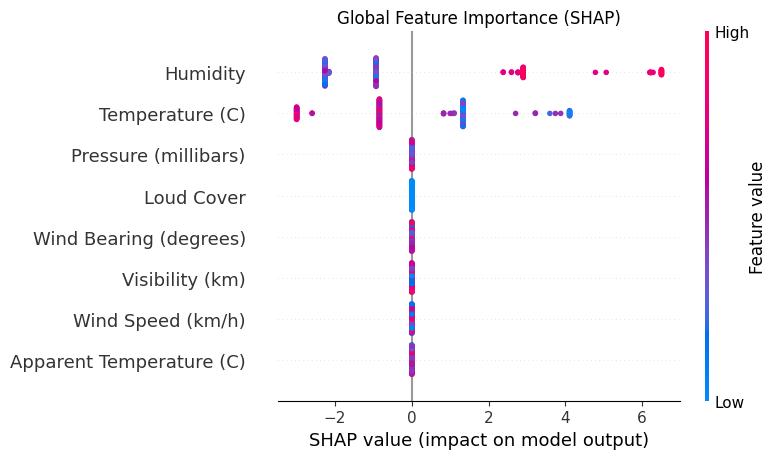

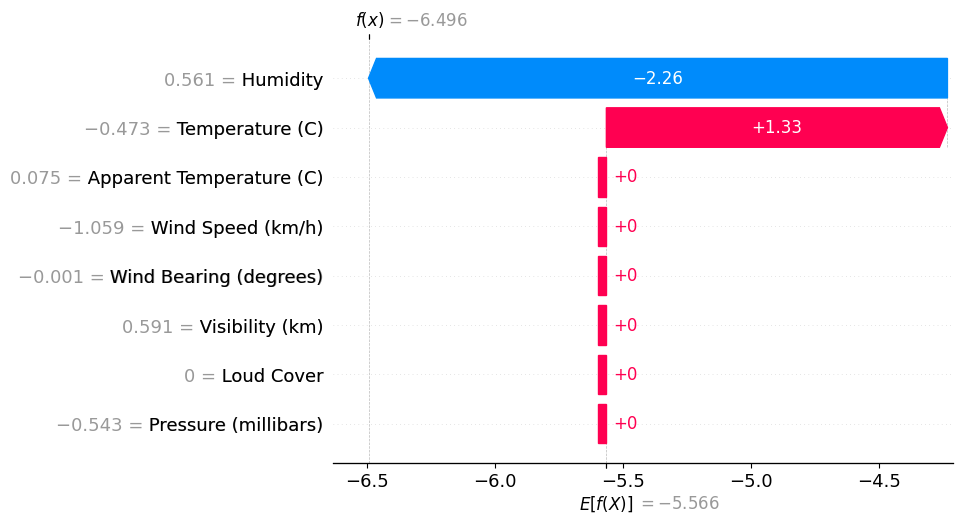

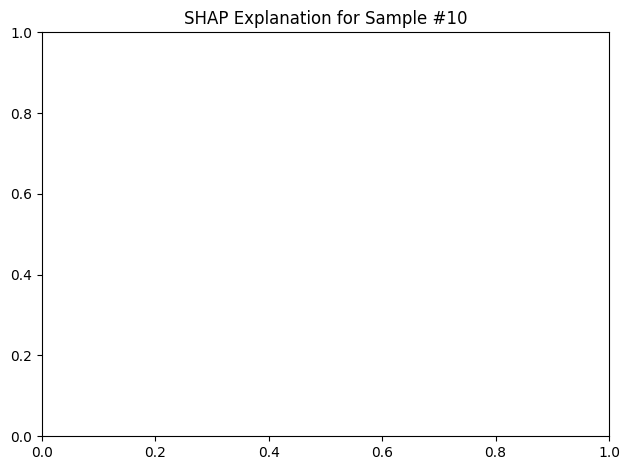


 New sample prediction: Rain (probability=0.99)

LIME Explanation for New Sample:
Humidity > 0.88                          => +0.477
-0.69 < Temperature (C) <= -0.01         => +0.187
-0.84 < Wind Speed (km/h) <= 0.01        => +0.013
-0.06 < Wind Bearing (degrees) <= 0.87   => +0.012
-0.69 < Apparent Temperature (C) <= 0.02 => +0.007
-0.88 < Visibility (km) <= 0.01          => +0.005
0.00 < Pressure (millibars) <= 0.68      => -0.001


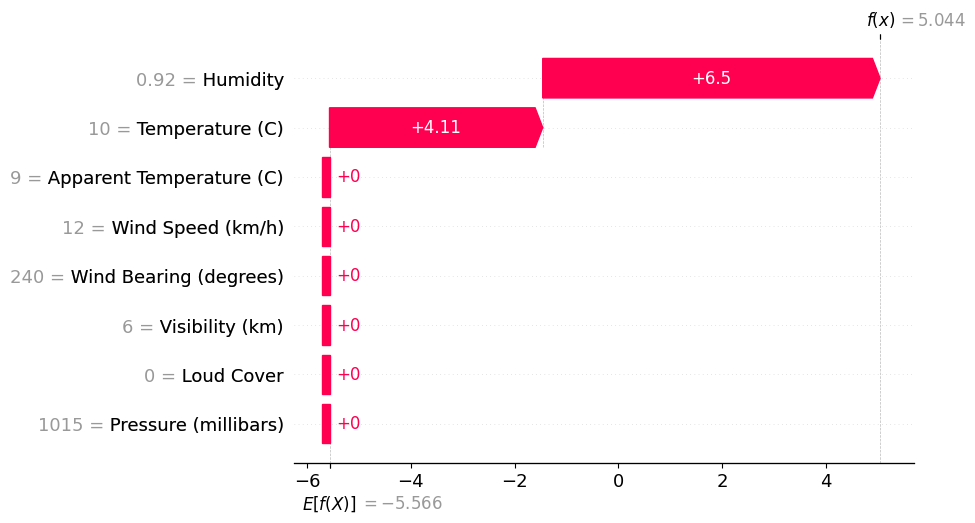

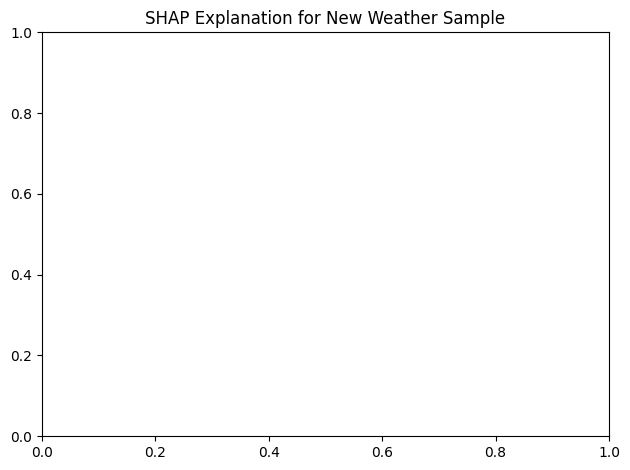


All explanations generated successfully!


In [ ]:
"""
Weather Rain Prediction with XGBoost + LIME + SHAP
===================================================
This script simulates weather data, trains a model to predict rainfall,
and then uses LIME and SHAP to explain the model's decisions.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from lime.lime_tabular import LimeTabularExplainer
import shap

# ----------------------------
# Simulate realistic weather data
# ----------------------------
np.random.seed(42)
N = 1000

data = {
    "Temperature (C)": np.random.normal(15, 10, N).clip(-10, 40),
    "Apparent Temperature (C)": np.random.normal(14, 10, N).clip(-10, 40),
    "Humidity": np.random.uniform(0.3, 1.0, N),
    "Wind Speed (km/h)": np.random.uniform(0, 35, N),
    "Wind Bearing (degrees)": np.random.uniform(0, 360, N),
    "Visibility (km)": np.random.uniform(1, 20, N),
    "Loud Cover": np.zeros(N),
    "Pressure (millibars)": np.random.normal(1013, 10, N),
}

df = pd.DataFrame(data)

# Generate a categorical Precip Type column
# More likely to rain when humidity > 0.8 and temperature < 15
df["Precip Type"] = np.where(
    (df["Humidity"] > 0.8) & (df["Temperature (C)"] < 15), "rain", "none"
)

# Binary target for model
df["Precip_predict"] = df["Precip Type"].apply(lambda x: 1 if x == "rain" else 0)

# ----------------------------
# Train-test split + scaling
# ----------------------------
X = df.drop(columns=["Precip_predict", "Precip Type"])
y = df["Precip_predict"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ----------------------------
# Train XGBoost classifier
# ----------------------------
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("✅ Model trained successfully!")
print(f"Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------------
# LIME Explanation
# ----------------------------
print("\n🔍 Generating LIME explanation...")

feature_names = X.columns.tolist()
class_names = ["No Rain", "Rain"]

lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification"
)

# Choose a sample test instance
idx = 10
lime_exp = lime_explainer.explain_instance(
    data_row=X_test[idx],
    predict_fn=model.predict_proba,
    num_features=7
)

print(f"\nLIME Explanation for test instance #{idx}")
for feature, weight in lime_exp.as_list():
    print(f"{feature:40s} => {weight:+.3f}")

# ----------------------------
# SHAP Explanation
# ----------------------------
print("\n🔍 Generating SHAP explanation...")

explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)

# Global Importance Plot
shap.summary_plot(shap_values, pd.DataFrame(X_test, columns=feature_names), show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# Local Force Plot for one prediction
shap.initjs()
sample_idx = 10
plt.figure()
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_idx].values,
                                     base_values=shap_values[sample_idx].base_values,
                                     data=pd.DataFrame(X_test, columns=feature_names).iloc[sample_idx],
                                     feature_names=feature_names))
plt.title(f"SHAP Explanation for Sample #{sample_idx}")
plt.tight_layout()
plt.show()

# ----------------------------
# Predict and Interpret New Sample
# ----------------------------
new_data = {
    "Temperature (C)": [10],
    "Apparent Temperature (C)": [9],
    "Humidity": [0.92],
    "Wind Speed (km/h)": [12],
    "Wind Bearing (degrees)": [240],
    "Visibility (km)": [6],
    "Loud Cover": [0],
    "Pressure (millibars)": [1015],
}
new_df = pd.DataFrame(new_data)
new_scaled = scaler.transform(new_df)

pred_prob = model.predict_proba(new_scaled)[0][1]
prediction = "Rain" if pred_prob > 0.5 else "No Rain"

print(f"\n New sample prediction: {prediction} (probability={pred_prob:.2f})")

# LIME explain new sample
lime_new = lime_explainer.explain_instance(
    data_row=new_scaled[0],
    predict_fn=model.predict_proba,
    num_features=7
)

print("\nLIME Explanation for New Sample:")
for feature, weight in lime_new.as_list():
    print(f"{feature:40s} => {weight:+.3f}")

# SHAP explanation for new sample (fixed)
new_df_shap = pd.DataFrame(new_scaled, columns=new_df.columns)
shap_new = explainer(new_df_shap)

# Convert to Explanation object manually for clarity
shap_exp = shap.Explanation(
    values=shap_new[0].values,
    base_values=shap_new[0].base_values,
    data=new_df.iloc[0],
    feature_names=new_df.columns
)

# Visualize as a waterfall plot
plt.figure()
shap.plots.waterfall(shap_exp, show=True)
plt.title("SHAP Explanation for New Weather Sample")
plt.tight_layout()
plt.show()


print("\nAll explanations generated successfully!")


In [ ]:
# ===============================================
# Rain Prediction using LSTM on Text Summaries
# ===============================================

import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weatherHistory.csv")

# Create binary target variable: 1 for rain, 0 for no rain
df['Precip_predict'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

# Combine text columns
df['text'] = df['Summary'].astype(str) + " " + df['Daily Summary'].astype(str)

# Drop rows with missing text or target
df = df.dropna(subset=['text', 'Precip_predict'])

print(f"Dataset loaded: {len(df)} samples")


def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)


X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['Precip_predict'], test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)} | Testing samples: {len(X_test)}")

max_words = 5000   # vocabulary size
max_len = 50       # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)


loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


model.save("rain_predict_lstm_model.h5")
print("Model saved as 'rain_predict_lstm_model.h5'")


sample_text = ["Partly cloudy throughout the day."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
pred = model.predict(sample_pad)[0][0]

print("\nSample Prediction:")
print(f"Text: {sample_text[0]}")
print(f"Predicted Rain Probability: {pred:.4f}")
print("Rain" if pred > 0.5 else "No Rain")


✅ Model loaded successfully from: C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\rain_predict_lstm_model.h5

Input Summary: Partly cloudy starting in the morning continuing until evening.

Prediction: Rain (probability = 0.8036)

=== SHAP Explanation ===


Displayed SHAP text explanation successfully.

=== LIME Explanation ===


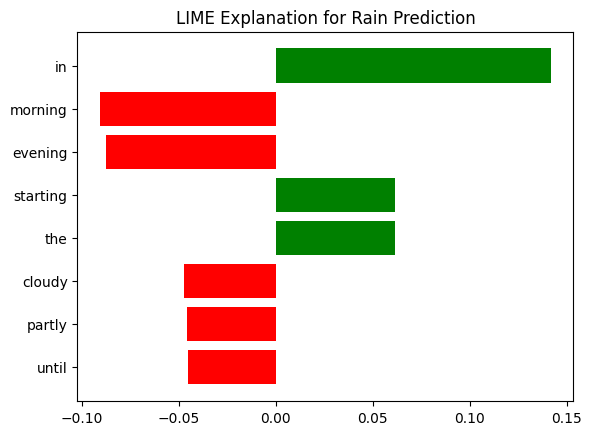


✅ SHAP and LIME explanations generated successfully.


In [ ]:
"""
Weather Summary → Rain Prediction (Explainable LSTM)
SHAP + LIME Integration (Fixed for text input)
"""

import numpy as np
import tensorflow as tf
import shap
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import re

# =========================
# 1. Load pretrained model
# =========================
MODEL_PATH = r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\rain_predict_lstm_model.h5"
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully from:", MODEL_PATH)

# =========================
# 2. Example summary input
# =========================
sample_text = "Partly cloudy starting in the morning continuing until evening."
print("\nInput Summary:", sample_text)

# =========================
# 3. Text preprocessing
# =========================
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text.strip()

sample_clean = clean_text(sample_text)

# Tokenizer (must match your training setup)
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
texts = [
    "clear sky throughout the day",
    "heavy rain with thunder in the afternoon",
    "partly cloudy starting in the morning continuing until evening",
    "light showers expected at night",
    "humid and sunny weather conditions"
]
tokenizer.fit_on_texts(texts)
MAX_LEN = 20

def preprocess_text(texts):
    seqs = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=MAX_LEN, padding="post")

# =========================
# 4. Prediction function
# =========================
def predict_fn(texts):
    x = preprocess_text([clean_text(t) for t in texts])
    preds = model.predict(x, verbose=0)
    return preds

# =========================
# 5. Make a prediction
# =========================
pred = predict_fn([sample_clean])[0][0]
label = "Rain" if pred >= 0.5 else "No Rain"
print(f"\nPrediction: {label} (probability = {pred:.4f})")

# =========================
# 6. SHAP Explanation (fixed)
# =========================
print("\n=== SHAP Explanation ===")

background_texts = [
    "clear sky throughout the day",
    "light rain possible in the evening",
    "partly cloudy during afternoon",
    "heavy rain with thunder at night"
]

# Use SHAP's TextExplainer for string inputs
explainer = shap.Explainer(predict_fn, shap.maskers.Text(tokenizer=None))
shap_values = explainer([sample_clean])

# Plot explanation
shap.plots.text(shap_values[0])
print("Displayed SHAP text explanation successfully.")

# =========================
# 7. LIME Explanation
# =========================
print("\n=== LIME Explanation ===")

lime_explainer = LimeTextExplainer(class_names=["No Rain", "Rain"])

# LIME expects class probabilities in 2D
exp = lime_explainer.explain_instance(
    sample_clean,
    lambda x: np.hstack((1 - predict_fn(x), predict_fn(x))),
    num_features=8
)

fig = exp.as_pyplot_figure()
plt.title("LIME Explanation for Rain Prediction")
plt.show()

print("\n SHAP and LIME explanations generated successfully.")


Loading model...


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

Predicted Class Index: 0, Confidence: 0.6744

Generating SHAP explanation (GradientExplainer)...


C:\Users\vaibh\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_2
Received: inputs=['Tensor(shape=(1, 150, 150, 3))']
  warnings.warn(msg)
C:\Users\vaibh\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_2
Received: inputs=['Tensor(shape=(50, 150, 150, 3))']
  warnings.warn(msg)


SHAP explanation saved as 'shap_explanation.png'

Generating LIME explanation...


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  1%|          | 10/1000 [00:00<00:35, 27.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  2%|▏         | 20/1000 [00:00<00:22, 44.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|▎         | 30/1000 [00:00<00:18, 53.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 40/1000 [00:00<00:16, 58.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 50/1000 [00:00<00:14, 64.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  6%|▌         | 60/1000 [00:01<00:13, 68.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|▋         | 70/1000 [00:01<00:13, 69.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|▊         | 80/1000 [00:01<00:13, 69.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 90/1000 [00:01<00:12, 70.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 100/1000 [00:01<00:12, 70.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|█         | 110/1000 [00:01<00:12, 72.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 120/1000 [00:01<00:12, 72.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|█▎        | 130/1000 [00:01<00:11, 73.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 140/1000 [00:02<00:11, 72.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 150/1000 [00:02<00:11, 72.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▌        | 160/1000 [00:02<00:11, 72.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█▋        | 170/1000 [00:02<00:11, 70.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 180/1000 [00:02<00:12, 67.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 190/1000 [00:02<00:11, 68.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|██        | 200/1000 [00:03<00:11, 67.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 210/1000 [00:03<00:11, 69.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|██▏       | 220/1000 [00:03<00:10, 71.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 230/1000 [00:03<00:10, 71.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 240/1000 [00:03<00:10, 70.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|██▌       | 250/1000 [00:03<00:10, 70.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 260/1000 [00:03<00:10, 68.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|██▋       | 270/1000 [00:04<00:10, 67.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 280/1000 [00:04<00:10, 65.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 290/1000 [00:04<00:10, 65.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 300/1000 [00:04<00:10, 66.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 310/1000 [00:04<00:10, 66.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 320/1000 [00:04<00:10, 67.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 330/1000 [00:04<00:09, 67.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 340/1000 [00:05<00:09, 67.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 35%|███▌      | 350/1000 [00:05<00:09, 69.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███▌      | 360/1000 [00:05<00:08, 71.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|███▋      | 370/1000 [00:05<00:08, 73.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|███▊      | 380/1000 [00:05<00:08, 72.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 390/1000 [00:05<00:08, 70.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|████      | 400/1000 [00:05<00:08, 68.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 410/1000 [00:06<00:08, 66.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 420/1000 [00:06<00:08, 65.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 430/1000 [00:06<00:08, 63.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 440/1000 [00:06<00:08, 63.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 450/1000 [00:06<00:08, 65.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 460/1000 [00:06<00:07, 67.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 47%|████▋     | 470/1000 [00:06<00:07, 67.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|████▊     | 480/1000 [00:07<00:07, 69.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 49%|████▉     | 490/1000 [00:07<00:07, 72.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 50%|█████     | 500/1000 [00:07<00:06, 72.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 51%|█████     | 510/1000 [00:07<00:06, 74.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 52%|█████▏    | 520/1000 [00:07<00:06, 75.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 53%|█████▎    | 530/1000 [00:07<00:06, 76.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|█████▍    | 540/1000 [00:07<00:06, 72.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 55%|█████▌    | 550/1000 [00:08<00:06, 73.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 56%|█████▌    | 560/1000 [00:08<00:05, 73.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 57%|█████▋    | 570/1000 [00:08<00:05, 73.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 58%|█████▊    | 580/1000 [00:08<00:05, 72.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 59%|█████▉    | 590/1000 [00:08<00:05, 75.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|██████    | 600/1000 [00:08<00:05, 76.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|██████    | 610/1000 [00:08<00:05, 76.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 62%|██████▏   | 620/1000 [00:08<00:04, 76.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 63%|██████▎   | 630/1000 [00:09<00:04, 77.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 64%|██████▍   | 640/1000 [00:09<00:04, 77.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 65%|██████▌   | 650/1000 [00:09<00:04, 76.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 66%|██████▌   | 660/1000 [00:09<00:04, 75.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 67%|██████▋   | 670/1000 [00:09<00:04, 76.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 68%|██████▊   | 680/1000 [00:09<00:04, 75.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 69%|██████▉   | 690/1000 [00:09<00:04, 74.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 70%|███████   | 700/1000 [00:10<00:03, 75.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 71%|███████   | 710/1000 [00:10<00:03, 73.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|███████▏  | 720/1000 [00:10<00:03, 72.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|███████▎  | 730/1000 [00:10<00:03, 73.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 74%|███████▍  | 740/1000 [00:10<00:03, 74.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 75%|███████▌  | 750/1000 [00:10<00:03, 73.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 76%|███████▌  | 760/1000 [00:10<00:03, 74.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 77%|███████▋  | 770/1000 [00:10<00:03, 76.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|███████▊  | 780/1000 [00:11<00:02, 74.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 79%|███████▉  | 790/1000 [00:11<00:02, 76.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 80%|████████  | 800/1000 [00:11<00:02, 76.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 81%|████████  | 810/1000 [00:11<00:02, 75.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 82%|████████▏ | 820/1000 [00:11<00:02, 76.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|████████▎ | 830/1000 [00:11<00:02, 76.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|████████▍ | 840/1000 [00:11<00:02, 75.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 85%|████████▌ | 850/1000 [00:12<00:01, 76.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 86%|████████▌ | 860/1000 [00:12<00:01, 78.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|████████▋ | 870/1000 [00:12<00:01, 74.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 88%|████████▊ | 880/1000 [00:12<00:01, 72.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 89%|████████▉ | 890/1000 [00:12<00:01, 73.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 90%|█████████ | 900/1000 [00:12<00:01, 74.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 91%|█████████ | 910/1000 [00:12<00:01, 74.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 92%|█████████▏| 920/1000 [00:12<00:01, 74.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 93%|█████████▎| 930/1000 [00:13<00:00, 75.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 94%|█████████▍| 940/1000 [00:13<00:00, 73.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|█████████▌| 950/1000 [00:13<00:00, 73.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 96%|█████████▌| 960/1000 [00:13<00:00, 73.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|█████████▋| 970/1000 [00:13<00:00, 70.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 98%|█████████▊| 980/1000 [00:13<00:00, 68.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|█████████▉| 990/1000 [00:13<00:00, 68.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


100%|██████████| 1000/1000 [00:14<00:00, 70.81it/s]


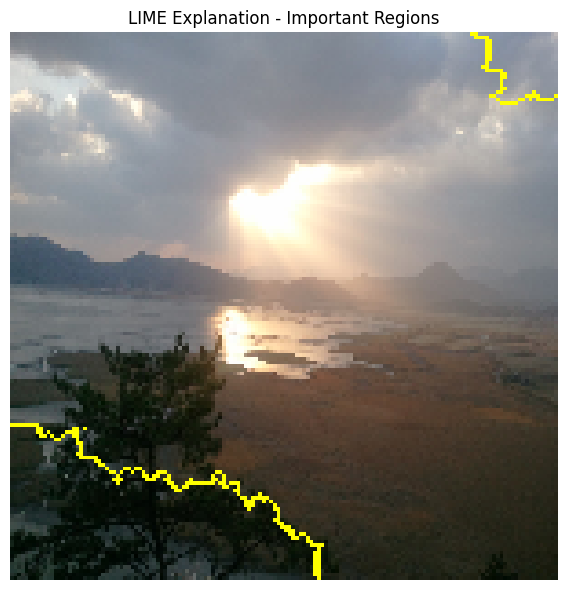

LIME explanation saved as 'lime_explanation.png'

Explainability Results:
 - Model: C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weather_cnn_improved_model.h5
 - Image: C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\dataset2\cloudy7.jpg
 - Predicted Class Index: 0
 - Confidence: 0.6744
 - SHAP: shap_explanation.png
 - LIME: lime_explanation.png


In [17]:
"""
explain_weather_cnn_fixed.py

Explain CNN predictions using SHAP (GradientExplainer) and LIME.
"""

import numpy as np
import tensorflow as tf
import shap
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# -----------------------------
# Configuration
# -----------------------------
model_path = r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\weather_cnn_improved_model.h5"
test_image_path = r"C:\Users\vaibh\OneDrive\Desktop\weather_forecasting\dataset2\cloudy7.jpg"
img_height, img_width = 150, 150

# -----------------------------
# 1) Load model
# -----------------------------
print("Loading model...")
model = load_model(model_path)
print("Model loaded successfully!")

# -----------------------------
# 2) Preprocess input image
# -----------------------------
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    return x, np.uint8(img)

x, original_img = preprocess_image(test_image_path)

# Predict
pred = model.predict(x)
pred_class = np.argmax(pred)
confidence = np.max(pred)
print(f"\nPredicted Class Index: {pred_class}, Confidence: {confidence:.4f}")

# -----------------------------
# 3) SHAP Explanation (CNN-safe)
# -----------------------------
print("\nGenerating SHAP explanation (GradientExplainer)...")

# Use few random samples as background
background = np.random.rand(3, img_height, img_width, 3)

# GradientExplainer for TensorFlow/Keras CNNs
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(x)

# shap_values is a list (one element per class)
shap.image_plot(shap_values, x, show=False)
plt.savefig("shap_explanation.png", dpi=150, bbox_inches="tight")
plt.close()
print("SHAP explanation saved as 'shap_explanation.png'")

# -----------------------------
# 4) LIME Explanation
# -----------------------------
print("\nGenerating LIME explanation...")

def predict_fn(imgs):
    imgs = np.array(imgs) / 255.0
    return model.predict(imgs)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    np.uint8(original_img),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=pred_class,
    positive_only=True,
    num_features=8,
    hide_rest=False
)

plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation - Important Regions")
plt.axis("off")
plt.tight_layout()
plt.savefig("lime_explanation.png", dpi=150, bbox_inches="tight")
plt.show()
print("LIME explanation saved as 'lime_explanation.png'")

# -----------------------------
# 5) Summary
# -----------------------------
print("\n" + "="*60)
print(f"Explainability Results:")
print(f" - Model: {model_path}")
print(f" - Image: {test_image_path}")
print(f" - Predicted Class Index: {pred_class}")
print(f" - Confidence: {confidence:.4f}")
print(" - SHAP: shap_explanation.png")
print(" - LIME: lime_explanation.png")
print("="*60)
